In [86]:
import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics import gofplots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [87]:
df = pd.read_csv(r"C:\Users\Choi\Desktop\Dataset\assignment02.csv")

In [88]:
df

,Unnamed: 0,Close
0,0,0.515321
1,1,0.362281
2,2,1.289079
3,3,0.439795
4,4,0.444916
...,...,...
995,995,0.076926
996,996,0.342668
997,997,0.715396
998,998,2.665324


## 1. (10 pts) Plot the given time series data. Does it appear to be a stationary series? Briefly discuss why or why not? (Just based on the shape of the plot)

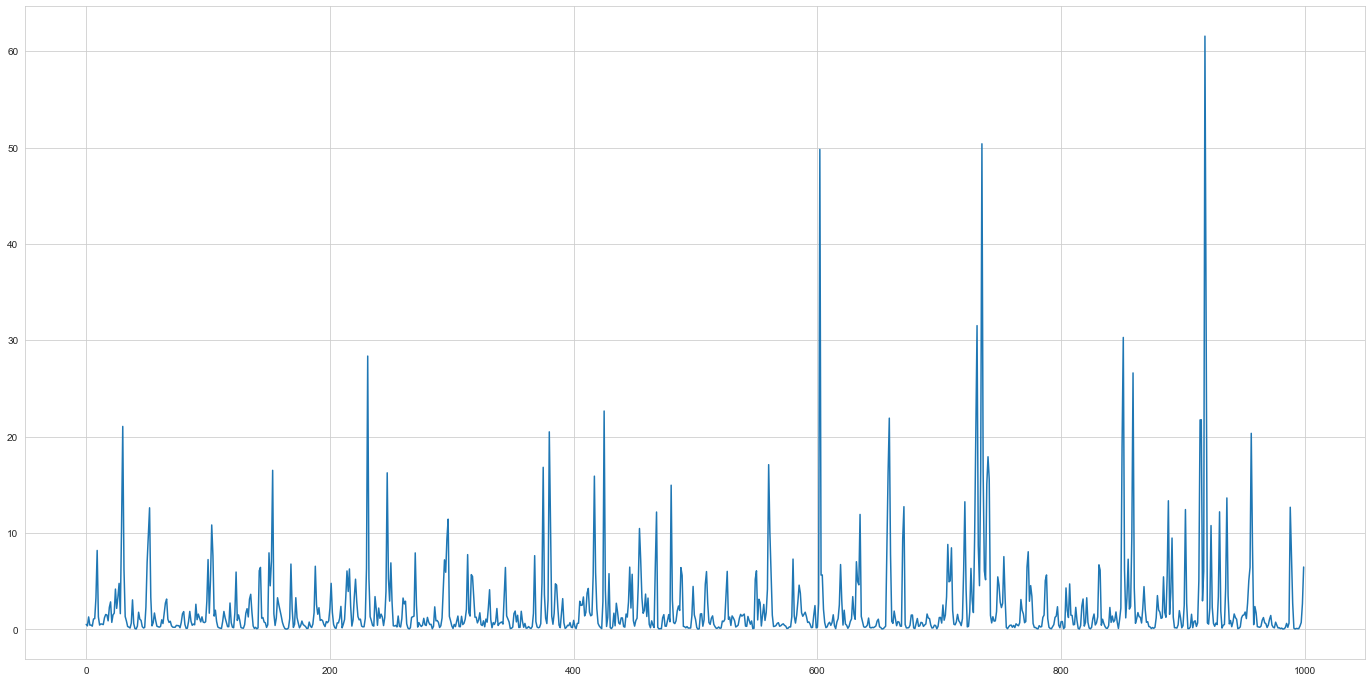

In [104]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax.plot(df.Close)

### It looks like non-stationary timeseries because variance increase when Y<sub>t</sub> to Y<sub>t+1</sub>

## 2. (10 pts) Apply transformations (e.g. log, power) and/or differencing to make the series look stationary. Show the plots and briefly discuss why or why not they look like a stationary series. (Just based on the shape of the plot)

In [99]:
log_price = list(map(lambda x : np.log(x),df.Close)) # Take logarithm
log_df = pd.DataFrame(log_price,columns=["Close"])

In [100]:
log_diff_1 =log_df.diff(periods=1)[1:] # Do first differencing
log_diff_1

,Close
1,-0.352368
2,1.269262
3,-1.075376
4,0.011577
5,-0.305328
...,...
995,0.046185
996,1.493914
997,0.736074
998,1.315244


Text(0.5, 1.0, 'First Differencing with logarithm')

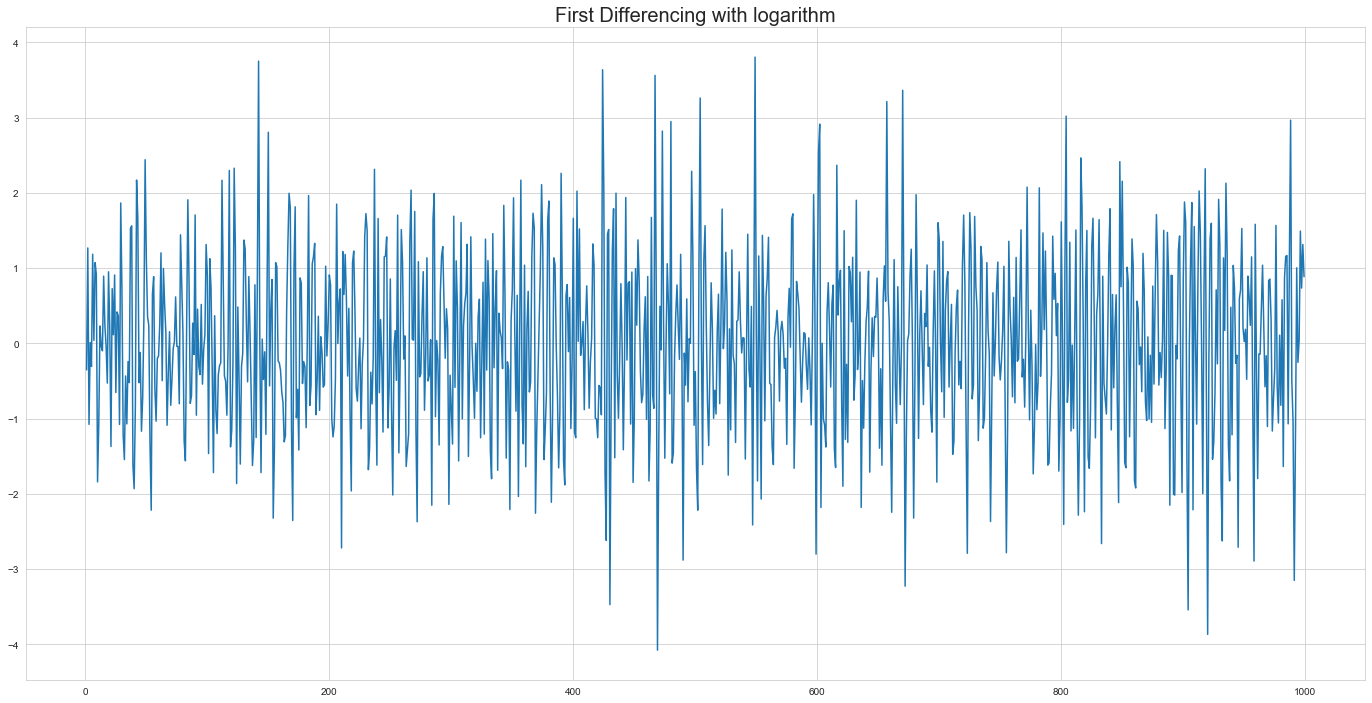

In [103]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax.plot(log_diff_1)
ax.set_title("First Differencing with logarithm",fontsize=20)

### When I take log(x+1) and first differencing to data and plot, data more likely to looks like it has constant mean, variance than before. As a result, it looks like stationary time series.

## 3. (10 pts) After transformation and/or differencing, plot its ACF and PACF. What would be the most appropriate orders of ARMA(p,q)? Briefly discuss why. (Just based on the shape of the ACF and PACF plots)

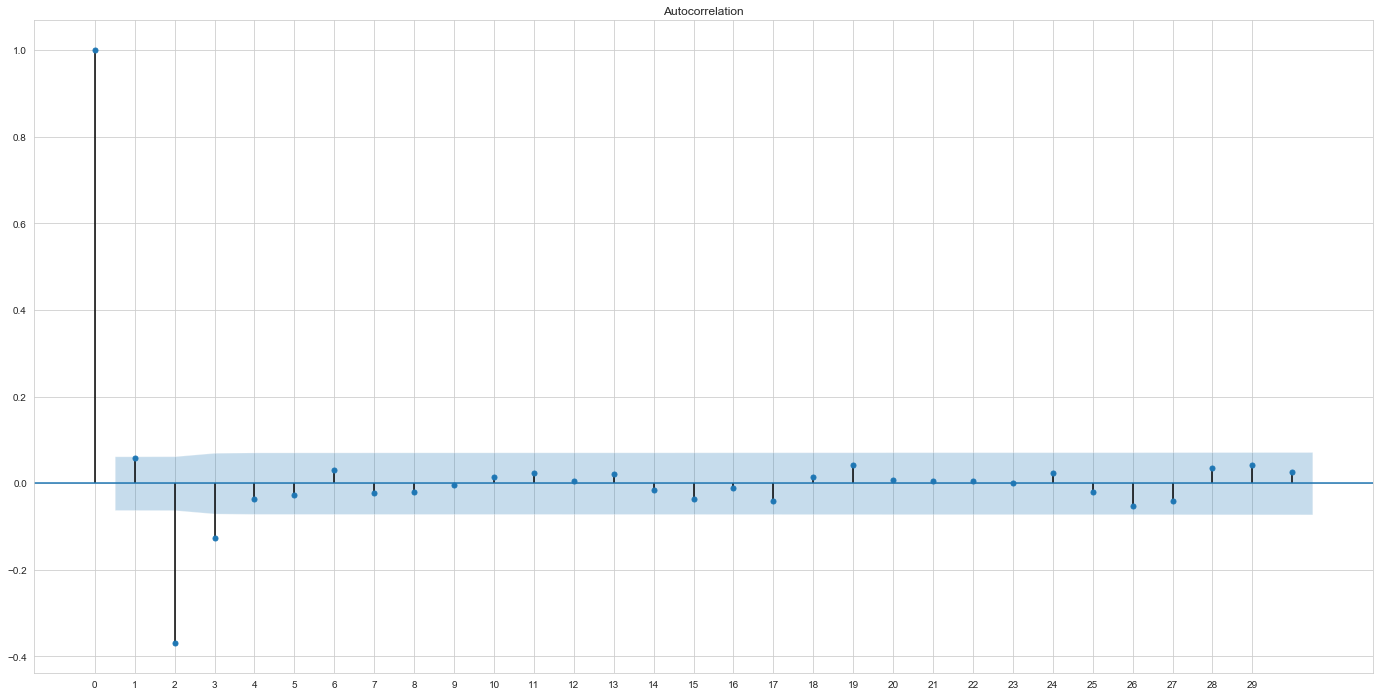

In [112]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(log_diff_1,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

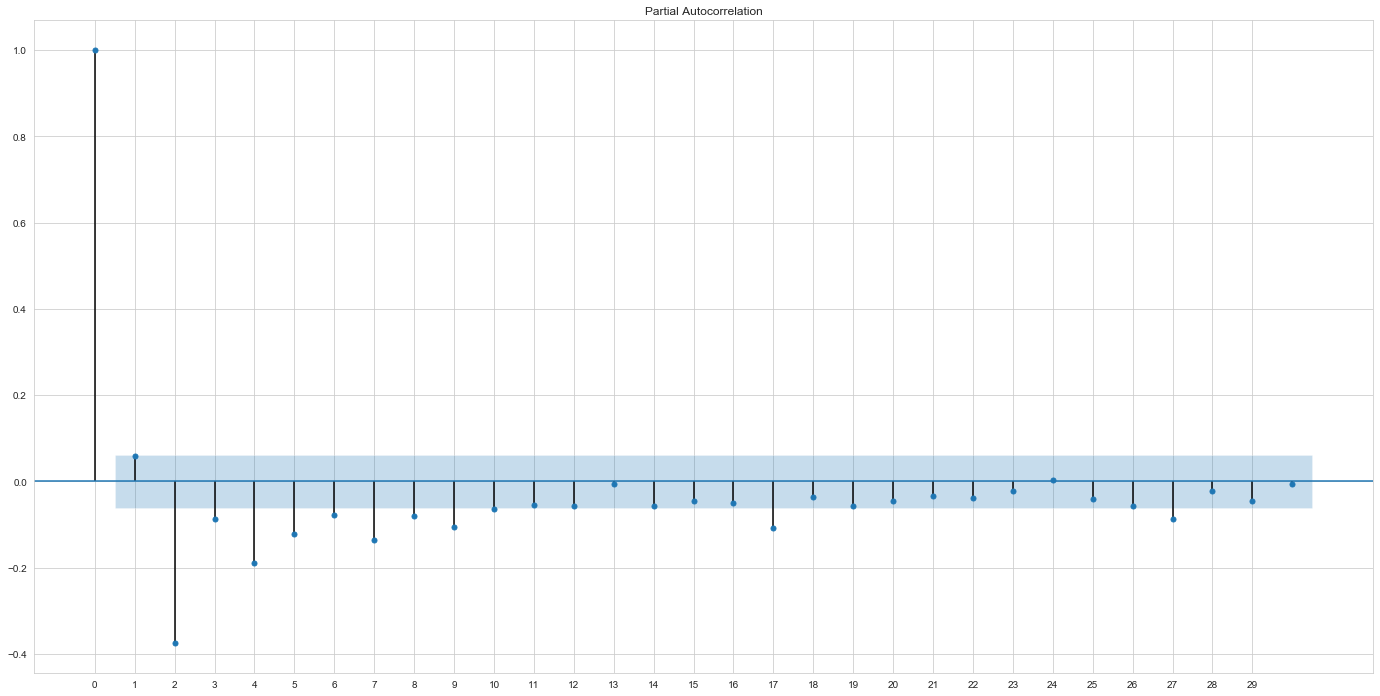

In [113]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_pacf(log_diff_1,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

### When we see ACF, we can know that it cuts off after time lag3. As a result in MA part, we can suggest MA(3) model.
### When we see PACF, we can know that it tails off so we can not determine exact AR(p)
### In conclusion, we can suggest ARMA(0,3) model.

## 4. (10 pts) Plot residuals after fitting the chosen ARMA(p,q) model. Also, plot its ACF and QQ-plot. Briefly discuss whether the model is appropriate or not.

Text(0.5, 1.0, 'ARMA(0,3) model')

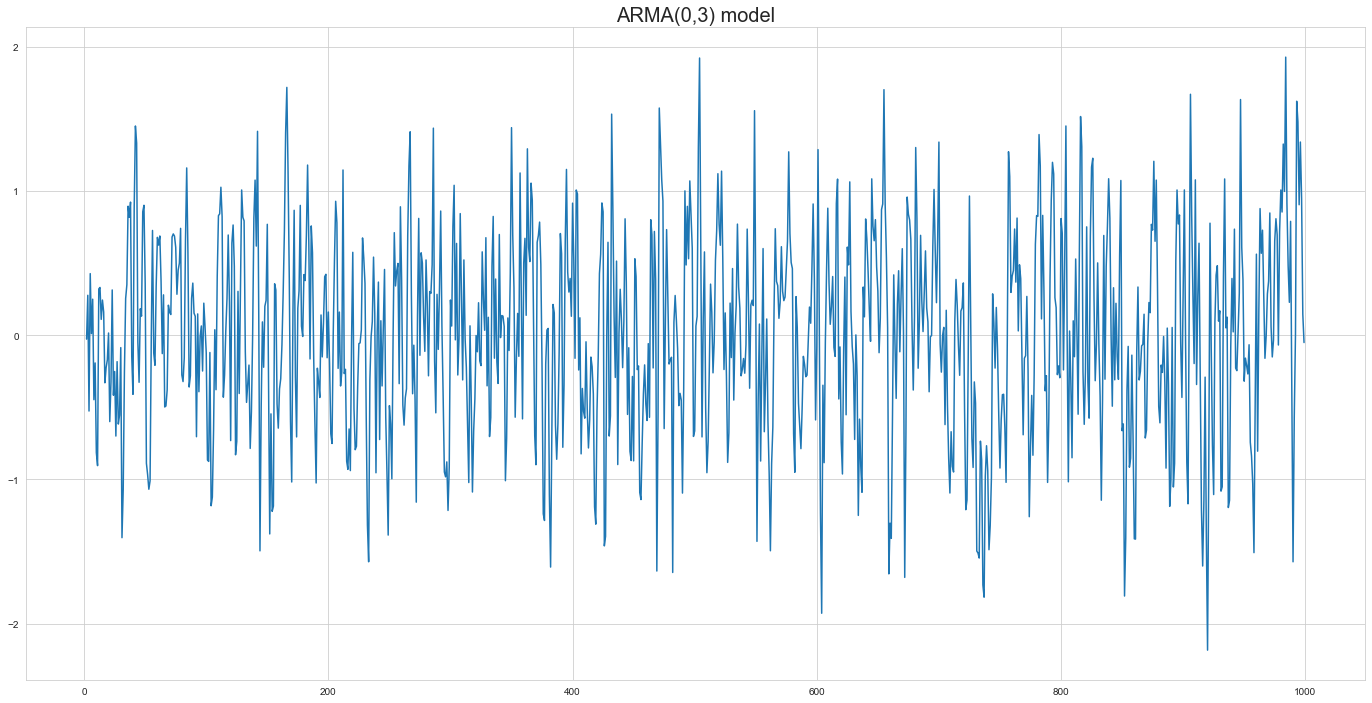

In [108]:
arma = ARIMA(log_diff_1,order=(0,0,3))
result = arma.fit(transparams=False)
pred = result.predict()
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
ax.plot(result.predict())
ax.set_title("ARMA(0,3) model",fontsize=20)

In [109]:
residual = result.resid

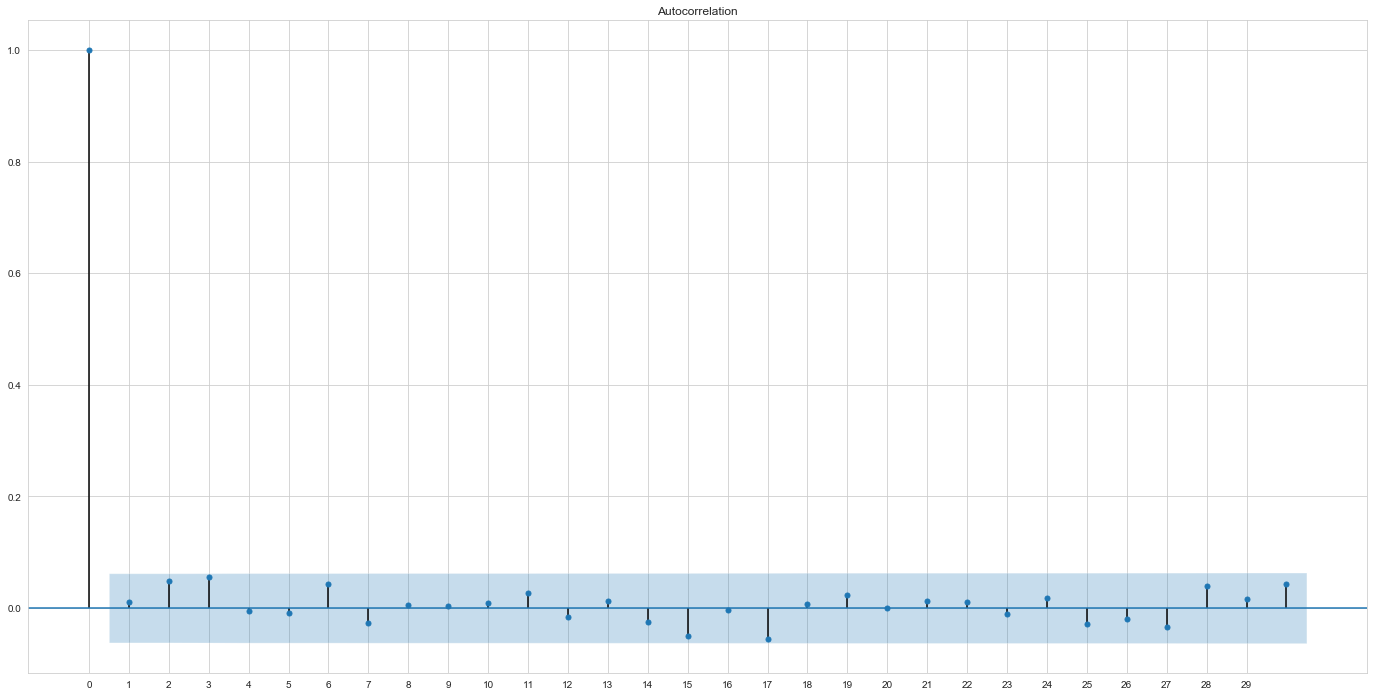

In [114]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,1)
plot_acf(residual,alpha=0.05,zero=True,ax=ax)
ax.set_xticks(np.arange(0,30,1))

Text(0.5, 1.0, 'Distribution of Residual')

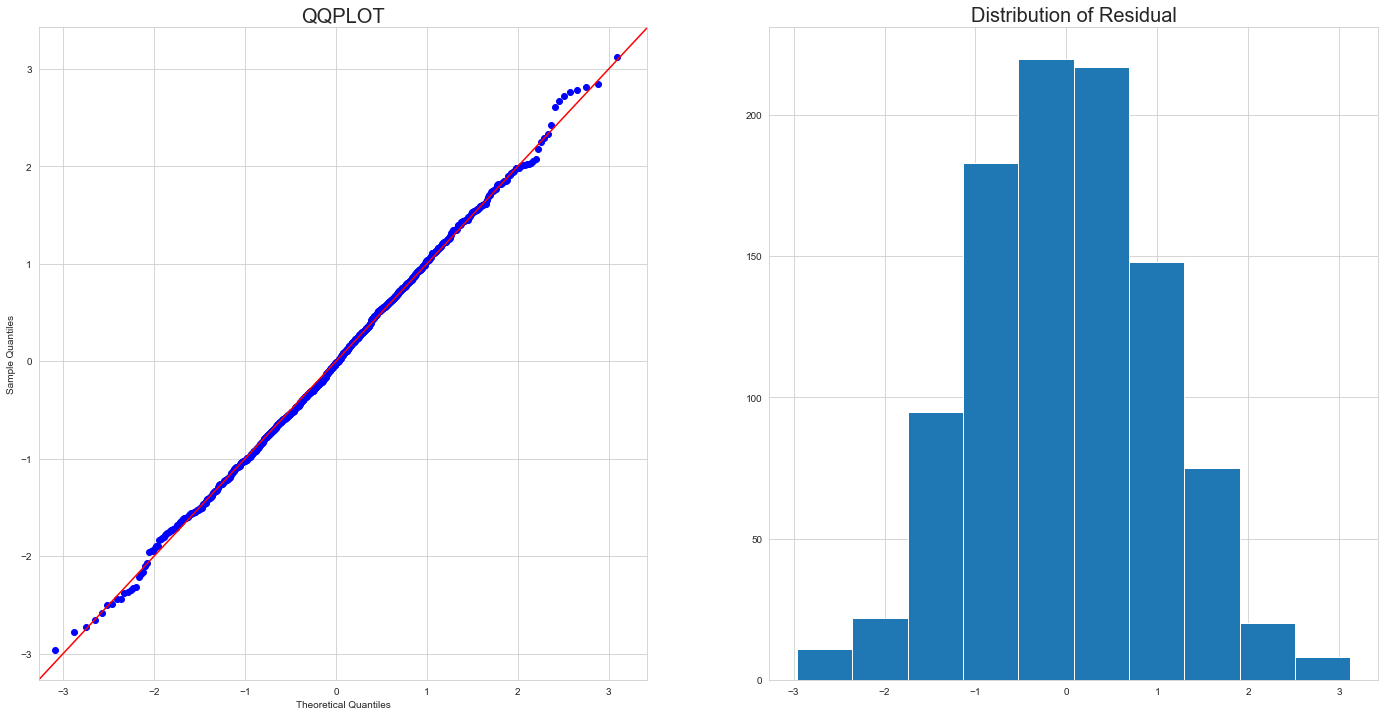

In [111]:
fig = plt.figure(figsize=(24,12))
ax = fig.subplots(1,2)
sm.graphics.gofplots.qqplot(residual,ax=ax[0],line="45")
ax[0].set_title("QQPLOT",fontsize=20)
ax[1].hist(resid)
ax[1].set_title("Distribution of Residual",fontsize=20)

### When we see ACF of residual, there is no correlationships between time lags k. As a result, it fitted well.
### Also when we see qqplot, residual follows normal distribution so data fitted well.